## Importing and Displaying Images from PASCAL VOC Dataset.

In [1]:
import os
import xml.etree.ElementTree as ET
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
def parse_xml_annotation(xml_file_path):
    tree = ET.parse(xml_file_path)
    root = tree.getroot()

    image_info = {}
    image_info['filename'] = root.find('filename').text
    size = root.find('size')
    image_info['width'] = int(size.find('width').text)
    image_info['height'] = int(size.find('height').text)

    objects = []
    for obj in root.findall('object'):
        obj_info = {}
        obj_info['name'] = obj.find('name').text
        bbox = obj.find('bndbox')
        obj_info['xmin'] = int(bbox.find('xmin').text)
        obj_info['ymin'] = int(bbox.find('ymin').text)
        obj_info['xmax'] = int(bbox.find('xmax').text)
        obj_info['ymax'] = int(bbox.find('ymax').text)
        objects.append(obj_info)

    image_info['objects'] = objects
    return image_info

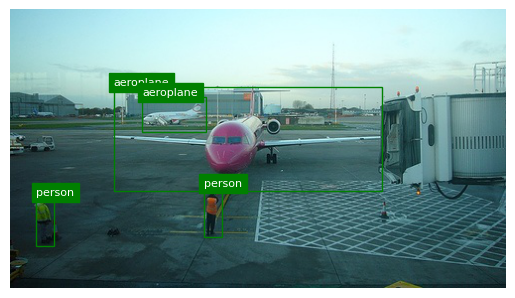

In [14]:
data_dir = 'E:\DUK\Summer Internship\Dataset\pascal VOC\VOC2012'  # Path to the Pascal VOC dataset
image_id = '2007_000032'  # Example image ID (change this to the desired image ID)

image_file_path = os.path.join(data_dir, 'JPEGImages', f'{image_id}.jpg')
xml_file_path = os.path.join(data_dir, 'Annotations', f'{image_id}.xml')

image_info = parse_xml_annotation(xml_file_path)
image = Image.open(image_file_path)

plt.imshow(image)
plt.axis('off')

# Draw bounding boxes on the image
for obj_info in image_info['objects']:
    xmin = obj_info['xmin']
    ymin = obj_info['ymin']
    xmax = obj_info['xmax']
    ymax = obj_info['ymax']
    label = obj_info['name']

    plt.gca().add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, edgecolor='g', linewidth=1, fill = False))
    plt.text(xmin, ymin - 2, label, backgroundcolor='g', fontsize=8, color='white')

plt.show()
